In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway

In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_housing_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_housing_df = pd.read_csv(boston_housing_url)

In [9]:
boston_housing_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Comentários:
A analise do cabeçalho dos dados indica valores em escalas distintas 

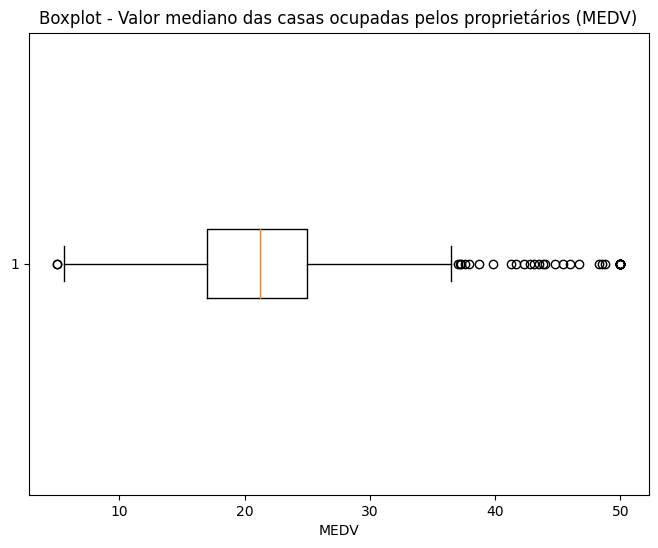

In [10]:
# Boxplot para o "Valor mediano das casas ocupadas pelos proprietários":
plt.figure(figsize=(8, 6))
plt.boxplot(boston_housing_df['MEDV'], vert=False)
plt.title('Boxplot - Valor mediano das casas ocupadas pelos proprietários (MEDV)')
plt.xlabel('MEDV')
plt.show()

Comentários: BoxPlot "Valor mediano das casas ocupadas pelos proprietários"
O gráfico acima mostra que a totalidade dos dados está fora da mediana (aproximadamente US$ 20,000.00), o que poderia ser identificado como outliers.

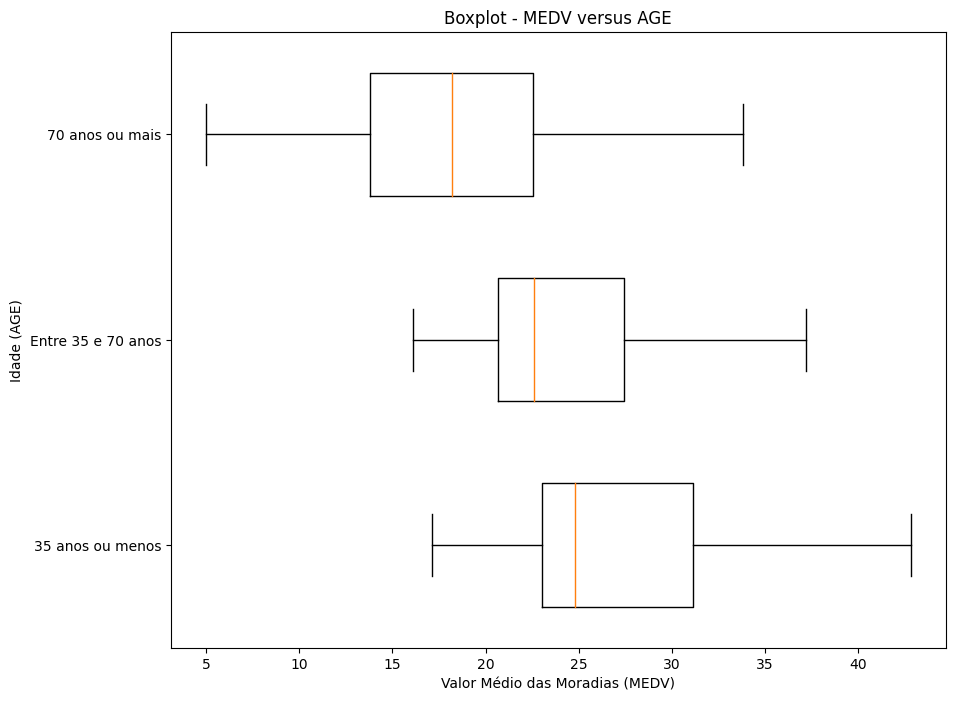

In [14]:
# Boxplot para MEDV versus AGE (Discretizado):
# Discretizar a variável AGE em três grupos
bins = [0, 35, 70, float('inf')]
labels = ['35 anos ou menos', 'Entre 35 e 70 anos', '70 anos ou mais']
boston_housing_df['AGE_Group'] = pd.cut(boston_housing_df['AGE'], bins=bins, labels=labels, right=False)

# Boxplot para MEDV versus AGE_Group
plt.figure(figsize=(10, 8))

# Criar boxplot usando Matplotlib
for label in labels:
    subset = boston_housing_df[boston_housing_df['AGE_Group'] == label]['MEDV']
    plt.boxplot(subset, positions=[labels.index(label) + 1], widths=0.6, showfliers=False, vert=False)

plt.yticks(range(1, len(labels) + 1), labels)
plt.title('Boxplot - MEDV versus AGE')
plt.xlabel('Valor Médio das Moradias (MEDV)')
plt.ylabel('Idade (AGE)')
plt.show()


Comentários: Boxplot "MEDV versus AGE"
O gráfico acima mostra que a proporção de unidades ocupadas por proprietários, independente da faixa etária, 
tem seu valor aproximadamente entre US$ 20,000.00 e US$ 25,000.00

In [21]:
from statsmodels.formula.api import ols

# Cria um modelo de regressão linear
model = ols('MEDV ~ C(AGE_Group)', data=boston_housing_df).fit()

# Cria uma tabela de ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Exibe a tabela de ANOVA
print(anova_table)

# Obtenha o p-valor
p_value = anova_table['PR(>F)'][0]

# Compare o p-valor com o nível de significância (α)
alpha = 0.05
if p_value < alpha:
    conclusion = "Rejeite a hipótese nula. Existe uma relação entre as concentrações de óxido nítrico e a proporção de hectares comerciais não varejistas por cidade."
else:
    conclusion = "Não rejeite a hipótese nula. Não há relação entre as concentrações de óxido nítrico e a proporção de acres comerciais não varejistas por cidade."

print("P-value:", p_value)
print("Conclusão:", conclusion)


                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
P-value: 1.7105011022701769e-15
Conclusion: Rejeite a hipótese nula. Existe uma relação entre as concentrações de óxido nítrico e a proporção de hectares comerciais não varejistas por cidade.


Comentários:
O valor-p é extremamente pequeno (1.7105011022701769e-15), muito menor que o nível de significância comum de 0.05. Portanto, você rejeitaria a hipótese nula. Isso sugere que existe uma diferença significativa entre os grupos de idade em relação à variável de resposta.

In [19]:
from scipy.stats import pearsonr

# Calcula a correção de Pearson a o p-value
corr, p_value = pearsonr(boston_housing_df['NOX'], boston_housing_df['INDUS'])

# Compara o p-value com o nível de significancia (α)
alpha = 0.05
if p_value < alpha:
    conclusion = "Rejeite a hipótese nula. Existe uma relação entre as concentrações de óxido nítrico e a proporção de hectares comerciais não varejistas por cidade."
else:
    conclusion = "Não rejeite a hipótese nula. Não há relação entre as concentrações de óxido nítrico e a proporção de acres comerciais não varejistas por cidade."

print("Coeficiente da Correlação de Pearson correlation:", corr)
print("P-value:", p_value)
print("Conclusão:", conclusion)

Coeficiente da Correlação de Pearson correlation: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusão: Rejeite a hipótese nula. Existe uma relação entre as concentrações de óxido nítrico e a proporção de hectares comerciais não varejistas por cidade.


Comentários:
Os dados indicam uma forte correlação positiva entre as concentrações de óxido nítrico (NOX) e a proporção de hectares comerciais não varejistas por cidade (INDUS).
O coeficiente de correlação de Pearson é 0.7636514469209192, o que indica uma forte correlação positiva. Isso significa que, à medida que a concentração de óxido nítrico aumenta, a proporção de hectares comerciais não varejistas por cidade também tende a aumentar.
O valor-p é 7.913361061210442e-98, que é extremamente pequeno. Um valor-p pequeno (geralmente ≤ 0.05) indica forte evidência contra a hipótese nula, então você rejeita a hipótese nula. Isso sugere que a correlação observada entre NOX e INDUS é estatisticamente significativa.

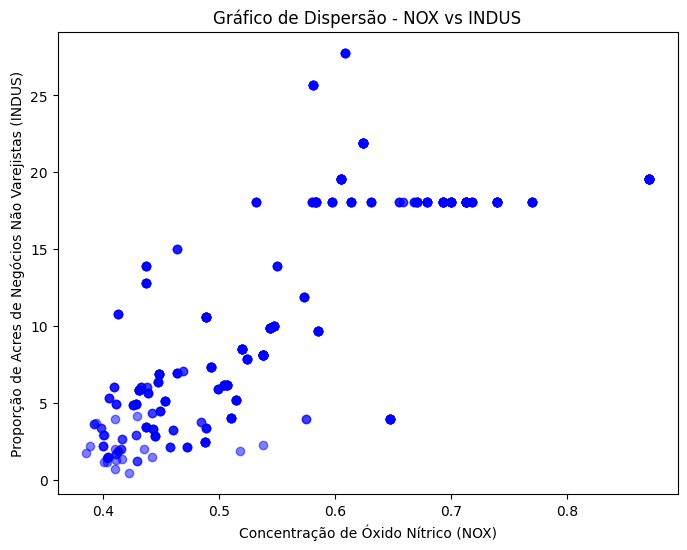

In [18]:
#Gráfico de dispersão para concentrações de óxido nítrico versus proporção de acres de negócios não varejistas:
plt.figure(figsize=(8, 6))
plt.scatter(boston_housing_df['NOX'], boston_housing_df['INDUS'], alpha=0.5, color='blue')
plt.title('Gráfico de Dispersão - NOX vs INDUS')
plt.xlabel('Concentração de Óxido Nítrico (NOX)')
plt.ylabel('Proporção de Acres de Negócios Não Varejistas (INDUS)')
plt.show()


Comentários Gráfico de Dispersão
Tendência: Há uma tendência crescente na proporção de INDUS com o aumento da concentração de NOX, indicando uma possível correlação positiva entre essas duas variáveis;
Densidade dos Dados: Há uma aglomeração visível dos pontos em torno da marca NOX 0,5–0,6, indicando uma alta densidade desses dados específicos.

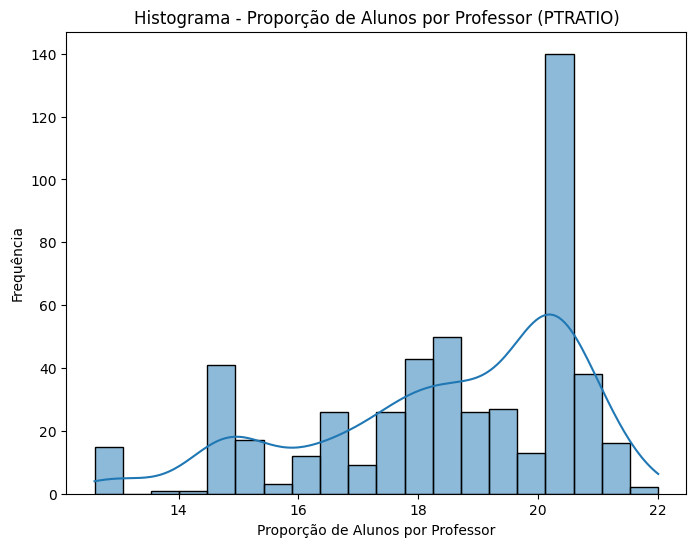

In [40]:
#Histograma para a variável de proporção de alunos por professor:
plt.figure(figsize=(8, 6))
sns.histplot(boston_housing_df['PTRATIO'], bins=20, kde=True)
plt.title('Histograma - Proporção de Alunos por Professor (PTRATIO)')
plt.xlabel('Proporção de Alunos por Professor')
plt.ylabel('Frequência')
plt.show()

Comentários Histograma
Quanto à interpretação da relação, observe como os pontos estão distribuídos no gráfico. 
Se houver uma tendência clara (por exemplo, os pontos seguem uma linha), isso pode indicar uma relação linear entre as duas variáveis. 
Se os pontos estiverem dispersos e não houver uma tendência clara, pode não haver uma relação linear evidente. 
A interpretação específica dependerá da distribuição dos pontos no gráfico e do conhecimento do domínio do problema.
